In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

In [26]:
### Let's drop duplicates.
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [27]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
df0 = df[df['stroke'] == 0]
df1 = df[df['stroke'] == 1]

df0['bmi'].fillna(df0['bmi'].mean(), inplace=True)
df1['bmi'].fillna(df1['bmi'].mean(), inplace=True)

df = pd.concat([df0, df1], axis=0)

C:\Users\goura\AppData\Local\Temp\ipykernel_23272\1563125837.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df0['bmi'].fillna(df0['bmi'].mean(), inplace=True)
C:\Users\goura\AppData\Local\Temp\ipykernel_23272\1563125837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['bmi'].fillna(df0['bmi'].mean(), inplace=True)
C:\Users\goura\Ap

In [29]:
# df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [30]:
### Category and sex are categorical objects needed to convert numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df['smoking_status']= le.fit_transform(df['smoking_status'])
df['work_type']= le.fit_transform(df['work_type'])
df['ever_married']= le.fit_transform(df['ever_married'])
df['residence_type']= le.fit_transform(df['residence_type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 249 to 248
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 419.2 KB


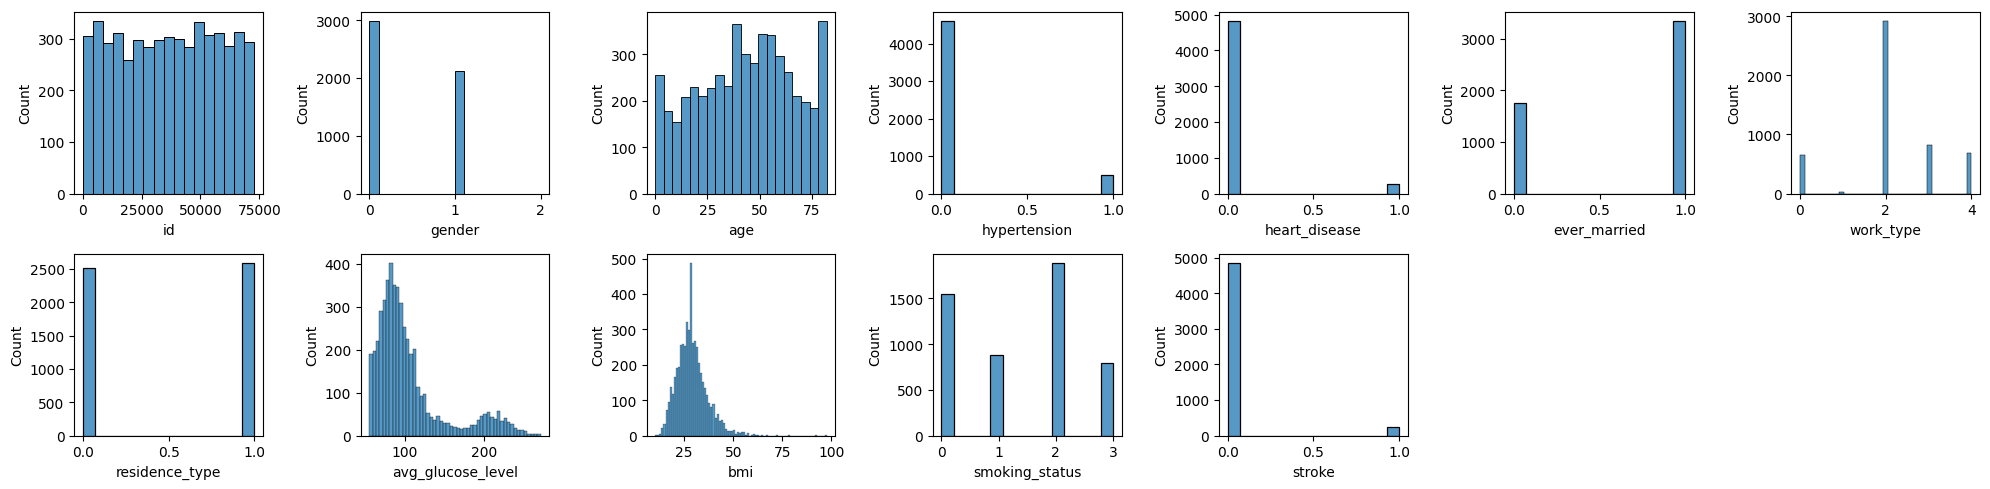

In [31]:
clms = ['gender','hypertension','heart_disease','ever_married','stroke']

import matplotlib.pyplot as plt
import seaborn as sns

def plotCols(dataframe):
    totalPlots = len(dataframe.columns)
    plotColumns = totalPlots//7+1
    plt.figure(figsize = (20, plotColumns*2.5))
    plotnumber = 1
    for column in dataframe.columns:
        if plotnumber <= totalPlots:
            ax = plt.subplot(plotColumns, 7, plotnumber)
            # sns.distplot(dataframe[column])
            sns.histplot(dataframe[column])
            plt.xlabel(column)
            
        plotnumber += 1

    plt.tight_layout()
    plt.show()

plotCols(df)

# for column in clms:
#     plt.figure(figsize=(10,3))
#     sns.countplot(x=df[column])
#     plt.title(f'Count Plot of {column}')
#     plt.ylabel('Count')
#     plt.show()

<Axes: >

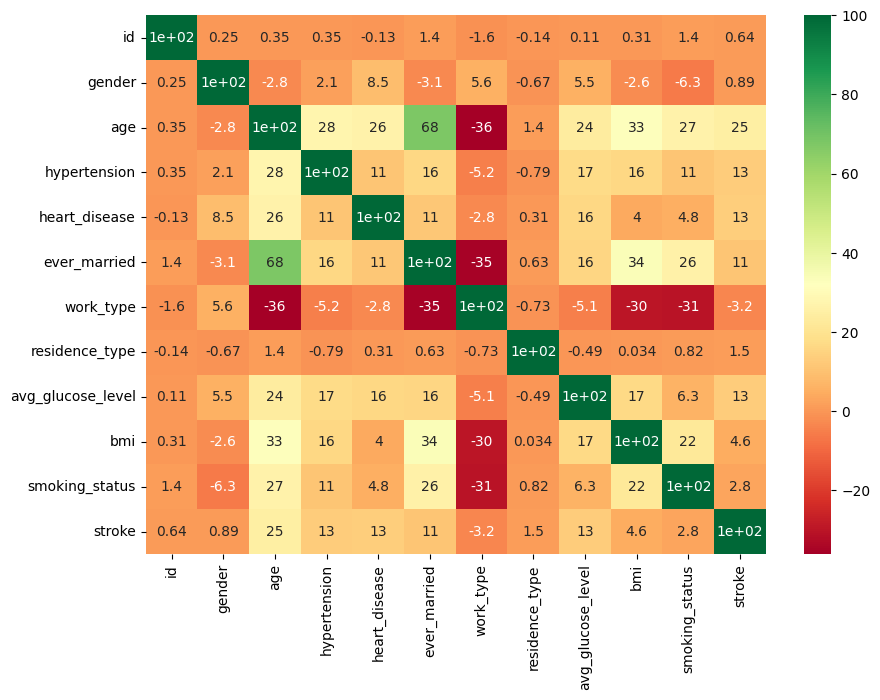

In [32]:
corr_metrix = df.corr()
cm = corr_metrix['stroke']*100
cm
plt.figure(figsize=(10,7))
sns.heatmap(corr_metrix*100, annot = True, cmap='RdYlGn')

In [33]:
X = df.drop(['id','gender','residence_type', 'stroke','work_type','smoking_status'], axis=1)
y = df['stroke']
print(X.shape,y.shape)
X.head()

(5110, 6) (5110,)


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
249,3.0,0,0,0,95.12,18.0
250,58.0,1,0,1,87.96,39.2
251,8.0,0,0,0,110.89,17.6
252,70.0,0,0,1,69.04,35.9
253,14.0,0,0,0,161.28,19.1


In [34]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=10, n_jobs=-1)
X, y = oversample.fit_resample(X, y)

c:\Users\goura\anaconda3\envs\tf\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=320)
print(X_train.shape,X_test.shape)

(7777, 6) (1945, 6)


In [36]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Train Acc -> ',lr.score(X_train,y_train)*100)
print('Test Acc -> ',lr.score(X_test,y_test)*100)

Train Acc ->  78.86074321717886
Test Acc ->  78.86889460154242


In [37]:
### hyperparameter tuning
# penalty = ['l1', 'l2', 'elasticnet']
# C = [1,10,15,20]
# solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# multi_class = ['auto', 'ovr', 'multinomial']

# params = {
    # 'penalty' : penalty,
    # 'C': C,
    # 'solver': solver
    # 'multi_class': multi_class
# }
# from sklearn.model_selection import GridSearchCV
# lr_grid = GridSearchCV(estimator=lr, param_grid=params, cv=5, n_jobs=-1)
# lr_grid.fit(X_train,y_train)
# print('Best Parameters -> ',lr_grid.best_params_)
# print('Best Parameters -> ',lr_grid.best_score_)

In [38]:
# # hyper parameter tuning of random forest

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import matplotlib.pyplot as plt

# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)


# from sklearn.model_selection import GridSearchCV
# grid_param = {
#     'n_estimators' : [100, 120, 150, 200, 250],
#     'criterion' : ['gini', 'entropy', 'log_loss'],
#     'max_depth' : [7, 10, 13, 15],
#     'class_weight': ['balanced', 
#                      'balanced_subsample'
#                      ],
#     # 'min_samples_leaf' : [1, 3, 5, 7],
#     # 'min_samples_split' : [2, 3, 5, 7],
#     'max_features' : ['sqrt', 'log2']
# }

# grid_search_rf = GridSearchCV(rf, grid_param, cv = 5, n_jobs = -1, verbose = 3)
# grid_search_rf.fit(X_train, y_train)



# # best parameters and best score
# print(grid_search_rf.best_params_)
# print(grid_search_rf.best_score_)
# print(grid_search_rf.best_estimator_)

Train Acc ->  99.94856628519995
Test Acc ->  91.31105398457584
[[866 104]
 [ 65 910]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       970
           1       0.90      0.93      0.92       975

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



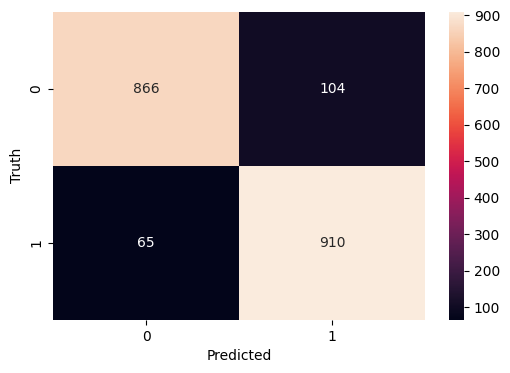

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=20, n_estimators=200)
rf.fit(X_train, y_train)
print('Train Acc -> ',rf.score(X_train,y_train)*100)
print('Test Acc -> ',rf.score(X_test,y_test)*100)
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test, y_pred))

In [40]:
y_pred = lr.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
cm = confusion_matrix(y_test, y_pred)
cm

[1 1 0 ... 0 1 0]


array([[754, 216],
       [195, 780]], dtype=int64)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       970
           1       0.78      0.80      0.79       975

    accuracy                           0.79      1945
   macro avg       0.79      0.79      0.79      1945
weighted avg       0.79      0.79      0.79      1945



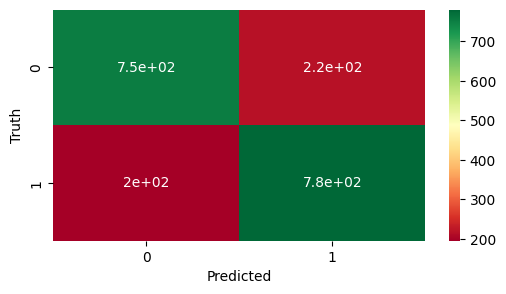

In [41]:
plt.figure(figsize=(6,3))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_pred))

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mae => ', mae)
print('mse => ', mse)
print('rmse => ', rmse)

mae =>  0.21131105398457584
mse =>  0.21131105398457584
rmse =>  0.45968582095228455


In [43]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./stroke-rf.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)

In [44]:
# evaluate model 
# LOAD AND USE THE SAVED MODEL USING PICKLE PACKAGE
with open(model_pkl_file, 'rb') as file:  
    loaded_rf = pickle.load(file)
    y_pred = loaded_rf.predict(X_test)

    # check results
    pred = loaded_rf.score(X_test, y_test)
    print(f"Accuracy : {pred * 100}%")

Accuracy : 91.31105398457584%
